In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Week-2

**Note to Learners**:

- For questions that involve plotting, just enter $0$ as the answer in the portal.
- For numerical questions, there are two parts. The first part expects you to compute some quantity, say a parameter of a machine learning model. The second part will require you to convert this quantity (if it is not a scalar) into a scalar so that it can be entered as the answer on the portal to the corresponding NAT question.



## Dataset

Run the cell given below to generate the data-matrix $\mathbf{X}$, which is of shape $(n, d)$, where $n$ denotes the number of samples and $d$ denotes the number of features. Ignore the vector $y$. You will be using this dataset for the rest of the assignment. Do not edit this cell.

In [4]:
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=1000, factor=0.9, noise=0.2, random_state=0)

## Problem 1
Plot the dataset using matplotlib.

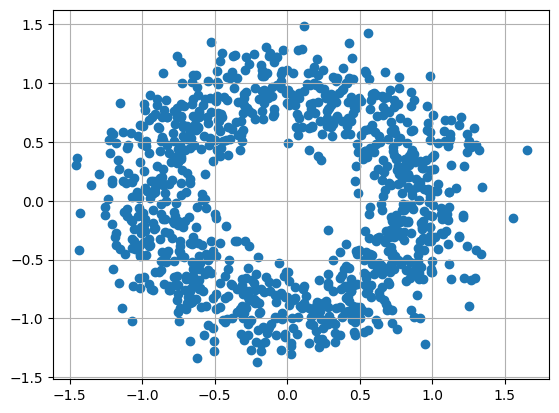

In [18]:
X=X.T
plt.scatter(X[0,:],X[1,:])
plt.grid()
plt.show()

## Problem 2
How many samples are there in the dataset?


In [14]:
X.shape[1] # X is d*n matrix. No. of sample =n

1000

## Problem 3
How many features are there in the dataset?

In [15]:
X.shape[0] # X is d*n matrix. No. of features =d

2

## Problem 4
Find the kernel matrix $K$ using the polynomial kernel with degree $2$.

<u>Conversion</u>

Enter the following quantity as your answer correct to two decimal places:

$$
\cfrac{1}{n} \sqrt{\sum \limits_{i = 1}^{n} \sum \limits_{j = 1}^{n} (K_{ij})^2}
$$

In [42]:
def pol_ker(A,B,k):
  return (A.T@B+1)**k

K = pol_ker(X,X,2)

print(K.shape)

d,n = X.shape

sum=0
for kij in np.nditer(K):
  sum+=(kij)**2

import math
numerator=math.sqrt(sum)
denominator=n

print(numerator/denominator)


(1000, 1000)
2.096195646589976


## Problem 5
Find the kernel matrix $K$ using the Gaussian kernel with parameter $\sigma = 2$.

<u>Conversion</u>

Enter the following quantity as your answer correct to two decimal places:

$$
\cfrac{1}{n} \sqrt{\sum \limits_{i = 1}^{n} \sum \limits_{j = 1}^{n} (K_{ij})^2}
$$

In [46]:
from scipy.spatial.distance import cdist

Z = cdist(X.T,X.T,metric="sqeuclidean")

K_gauss = np.exp(-Z/8)

print(np.sqrt(np.sum(K_gauss**2))/n)


0.8079400085320029


## Problem 6
Find the center of the kernel matrix $K$ obtained in problem 2. Call this centered matrix $KC$.

<u>Conversion</u>

Enter the following quantity as your answer correct to two decimal places:

$$
\cfrac{1}{n} \sqrt{\sum \limits_{i = 1}^{n} \sum \limits_{j = 1}^{n} KC_{ij}^2}
$$

In [43]:
I=np.zeros([n,n])+(1/n) # Adds 1/n to every element

def pol_ker(A,B,k):
  return (A.T@B+1)**k

K = pol_ker(X,X,2)

KC = K - I @ K - K @ I + I @ K @ I

print(np.sqrt(np.sum(KC**2))/n)

1.4517985176976844


## Problem 7
Find the projections (scalar) of all the data points on to the first two principal components obtained using polynomial kernel of degree 2.

<u>Conversion</u>

if $\alpha_1, \alpha_2, ..., \alpha_n$ are the prjections on the first PC and $\beta_1, \beta_2, ..., \beta_n$ are the projections on the second PC, enter the following quantity as your answer correct to two decimal places:

$$\sum_{i = 1}^{n} \alpha_i + \sum_{i = 1}^{n} \beta_i$$

1.7725052155427554


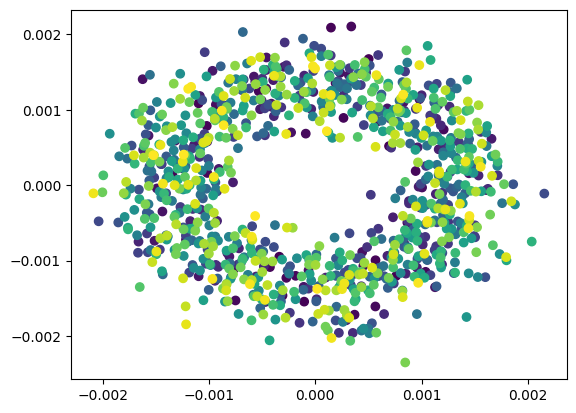

In [52]:
eigvals, eigvecs = np.linalg.eigh(KC)

# Sort eigenvectors by decreasing eigen values
eigvals, eigvecs = eigvals[::-1],eigvecs[:,::-1]

#Select top 2 components
alphas = eigvecs[:,:2] / np.sqrt(eigvals[:2])

pc1 = alphas[:,0]
pc2 = alphas[:,1]

print(np.sum(abs(pc1))+np.sum(abs(pc2)))

plt.scatter(pc1,pc2,c=range(len(pc1)))
plt.show()

